In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

# 2021시즌 Blake Snell 투구 분석

샌디에이고 파드리스의 투수 Blake Snell의 2021시즌 투구에 대해 분석하였다. Snell은 시즌 중 부진했지만, 시즌 후반 반등하면서 좋은 성적을 거두었다. 어떤 변화가 있었는지 살펴보았다.

#### ff=포심, sl=슬라이더, cb=커브, ch=체인지업

In [2]:
ff21 = pd.read_csv('snell_ff_21.csv')
sl21 = pd.read_csv('snell_sl_21.csv')
cb21 = pd.read_csv('snell_cb_21.csv')
ch21 = pd.read_csv('snell_ch_21.csv')

In [3]:
# column 정리
ff = ff21.drop(['des','game_type','p_throws','game_year','inning_topbot','pitcher.1','tfs_deprecated', 'tfs_zulu_deprecated','fielder_2',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9','bat_score', 'fld_score', 'post_away_score',
       'post_home_score', 'post_bat_score', 'post_fld_score','umpire', 'sv_id',
       'if_fielding_alignment', 'of_fielding_alignment','delta_home_win_exp', 'delta_run_exp',
        'spin_rate_deprecated','break_angle_deprecated', 'break_length_deprecated','effective_speed',
        'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle','woba_value', 'woba_denom', 'babip_value', 'iso_value'],
        axis=1)
sl = sl21.drop(['des','game_type','p_throws','game_year','inning_topbot','pitcher.1','tfs_deprecated', 'tfs_zulu_deprecated','fielder_2',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9','bat_score', 'fld_score', 'post_away_score',
       'post_home_score', 'post_bat_score', 'post_fld_score','umpire', 'sv_id',
       'if_fielding_alignment', 'of_fielding_alignment','delta_home_win_exp', 'delta_run_exp',
        'spin_rate_deprecated','break_angle_deprecated', 'break_length_deprecated','effective_speed',
        'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle','woba_value', 'woba_denom', 'babip_value', 'iso_value'],
        axis=1)
cb = cb21.drop(['des','game_type','p_throws','game_year','inning_topbot','pitcher.1','tfs_deprecated', 'tfs_zulu_deprecated','fielder_2',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9','bat_score', 'fld_score', 'post_away_score',
       'post_home_score', 'post_bat_score', 'post_fld_score','umpire', 'sv_id',
       'if_fielding_alignment', 'of_fielding_alignment','delta_home_win_exp', 'delta_run_exp',
        'spin_rate_deprecated','break_angle_deprecated', 'break_length_deprecated','effective_speed',
        'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle','woba_value', 'woba_denom', 'babip_value', 'iso_value'],
        axis=1)
ch = ch21.drop(['des','game_type','p_throws','game_year','inning_topbot','pitcher.1','tfs_deprecated', 'tfs_zulu_deprecated','fielder_2',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9','bat_score', 'fld_score', 'post_away_score',
       'post_home_score', 'post_bat_score', 'post_fld_score','umpire', 'sv_id',
       'if_fielding_alignment', 'of_fielding_alignment','delta_home_win_exp', 'delta_run_exp',
        'spin_rate_deprecated','break_angle_deprecated', 'break_length_deprecated','effective_speed',
        'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle','woba_value', 'woba_denom', 'babip_value', 'iso_value'],
        axis=1)

## Blake Snell의 실점 그래프

In [4]:
total = pd.concat([ff, sl, cb, ch])
total.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,zone,stand,home_team,away_team,type,hit_location,bb_type,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,hc_x,hc_y,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,release_spin_rate,release_extension,game_pk,release_pos_y,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,spin_axis
0,FF,2021-09-12,94.8,2.21,6.60,"Snell, Blake",607208,605483,NaN,called_strike,NaN,9,R,LAD,SD,S,NaN,NaN,0,0,0.56,1.47,0.82,1.69,NaN,NaN,NaN,2,1,NaN,NaN,-4.946258,-137.723854,-10.515603,8.283242,30.643059,-11.333586,3.35,1.59,NaN,NaN,NaN,2394.0,6.8,632568,53.68,NaN,6,1,4-Seam Fastball,0,0,158.0
1,FF,2021-09-12,95.0,2.12,6.69,"Snell, Blake",571970,605483,field_out,hit_into_play,NaN,2,L,LAD,SD,X,7.0,fly_ball,0,0,0.43,1.35,-0.23,2.85,NaN,NaN,NaN,1,1,66.36,110.02,-7.131212,-138.113845,-7.480351,7.028084,29.497739,-13.365310,3.37,1.53,266.0,99.3,52.0,2389.0,6.5,632568,54.00,3.0,5,1,4-Seam Fastball,0,0,154.0
2,FF,2021-09-12,94.6,2.14,6.62,"Snell, Blake",605141,605483,NaN,foul,NaN,1,R,LAD,SD,S,NaN,NaN,3,2,0.55,1.37,-0.37,3.09,NaN,NaN,NaN,0,1,NaN,NaN,-7.819203,-137.443778,-6.595055,8.719307,30.886467,-13.553710,3.29,1.49,364.0,100.0,33.0,2355.0,6.7,632568,53.79,NaN,4,6,4-Seam Fastball,0,0,152.0
3,FF,2021-09-12,94.9,2.16,6.74,"Snell, Blake",605141,605483,NaN,ball,NaN,12,R,LAD,SD,B,NaN,NaN,2,2,0.49,1.49,0.54,4.00,NaN,NaN,NaN,0,1,NaN,NaN,-5.360805,-137.996963,-4.857418,7.444272,31.224607,-12.312353,3.21,1.49,NaN,NaN,NaN,2244.0,6.7,632568,53.83,NaN,4,5,4-Seam Fastball,0,0,156.0
4,FF,2021-09-12,94.3,2.28,6.73,"Snell, Blake",605141,605483,NaN,called_strike,NaN,4,R,LAD,SD,S,NaN,NaN,2,1,0.46,1.36,-0.62,2.55,NaN,NaN,NaN,0,1,NaN,NaN,-8.557280,-136.885080,-8.188033,7.666239,29.291002,-13.370434,3.13,1.49,NaN,NaN,NaN,2318.0,6.4,632568,54.07,NaN,4,4,4-Seam Fastball,0,0,155.0


In [5]:
total_home = total[total['home_team']=='SD']
total_away = total[total['away_team']=='SD']

In [6]:
home_r = total_home.groupby(['game_date'])['away_score'].max().reset_index()
away_r = total_away.groupby(['game_date'])['home_score'].max().reset_index()

In [7]:
total_r = pd.concat([home_r, away_r]).sort_values('game_date')
total_r['runs'] = np.where(total_r['home_score'].isnull(),total_r['away_score'],None)
total_r['runs'] = np.where(total_r['away_score'].isnull(),total_r['home_score'],total_r['runs'])
total_r = total_r[['game_date','runs']]

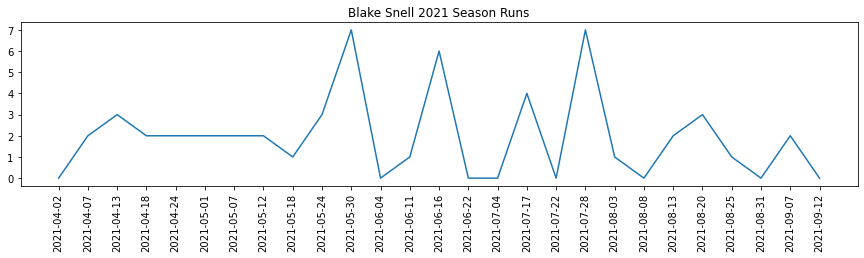

In [8]:
plt.figure(figsize=(15,3))
plt.plot(total_r['game_date'], total_r['runs'])
plt.title('Blake Snell 2021 Season Runs')
plt.xticks(rotation=90)
plt.show()


Blake Snell이 실점한 그래프를 확인해보니   
**5,6,7월에 부진한 모습을 보이다가 8월부터 다시 안정적인 모습을 보여준다.**   
8월 이전과 이후로 나누어서 Blake Snell의 투구에 어떤 변화가 있었는지 분석해보았다.
********************************************

### K/BB의 변화

In [9]:
total_event = total.groupby(['game_date','events'])['batter'].count().reset_index().rename(columns={'batter': 'count'})
total_event

,game_date,events,count
0,2021-04-02,double,1
1,2021-04-02,field_out,6
2,2021-04-02,fielders_choice,1
3,2021-04-02,single,3
4,2021-04-02,strikeout,8
...,...,...,...
156,2021-09-07,sac_bunt,1
157,2021-09-07,single,1
158,2021-09-07,strikeout,11
159,2021-09-07,walk,2


In [10]:
# 4-7월
apr_jul_k = total_event[(total_event['game_date']<'2021-08-01') & (total_event['events']=='strikeout')]['count'].sum()
apr_jul_b = total_event[(total_event['game_date']<'2021-08-01') & (total_event['events']=='walk')]['count'].sum()
# 8-9월
aug_sep_k = total_event[(total_event['game_date']>='2021-08-01') & (total_event['events']=='strikeout')]['count'].sum()
aug_sep_b = total_event[(total_event['game_date']>='2021-08-01') & (total_event['events']=='walk')]['count'].sum()

4-7월 K/BB 1.93, 8-9월 K/BB 4.64


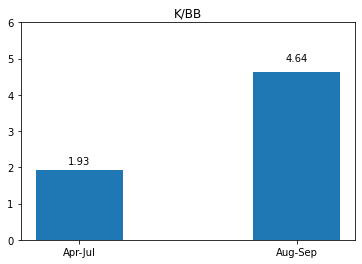

In [11]:
apr_jul_kbb = apr_jul_k/apr_jul_b
aug_sep_kbb = aug_sep_k/aug_sep_b
print('4-7월 K/BB {0}, 8-9월 K/BB {1}'.format(round(apr_jul_kbb,2), round(aug_sep_kbb,2)))
x = ['Apr-Jul', 'Aug-Sep']
y = [round(apr_jul_kbb,2), round(aug_sep_kbb,2)]
fig, ax = plt.subplots()
bar_plot = plt.bar(x,y, width=0.4)
def autolabel(rects):
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                y[idx],
                ha='center', va='bottom', rotation=0)
autolabel(bar_plot)
plt.ylim(0,6)
plt.title('K/BB')
plt.show()

**4-7월에는 K/BB가 1.93**을 기록하였지만, **8월 이후 K/BB가 4.64**로 크게 향상되었다.
*******************************

### 구종의 변화

In [12]:
total['month'] = pd.to_datetime(total['game_date']).dt.month
apr_jul = total[total['month']<=7]
aug_sep = total[total['month']>=8]

In [13]:
apr_jul_type = apr_jul.groupby('pitch_type')['type'].count().reset_index()
aug_sep_type = aug_sep.groupby('pitch_type')['type'].count().reset_index()

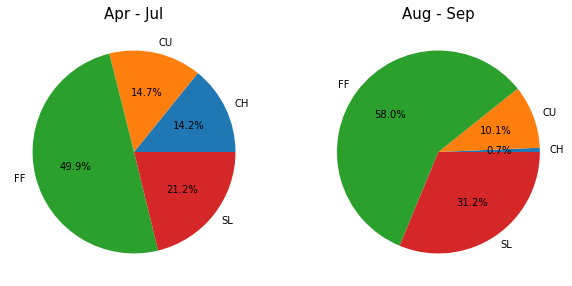

In [14]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.pie(apr_jul_type['type'], labels=apr_jul_type['pitch_type'], autopct='%.1f%%')
plt.title('Apr - Jul', size=15)
plt.subplot(1,2,2)
plt.pie(aug_sep_type['type'], labels=aug_sep_type['pitch_type'], autopct='%.1f%%')
plt.title('Aug - Sep', size=15)
plt.show()

8월 이전과 이후에 **구종 구사 비율이 변화되었다.** 8월 이후 커브와 체인지업 비중이 줄어들었고, 포심과 슬라이더의 비중을 높였다. **체인지업은 거의 던지지 않았다.**
**********************************

### 구종별 구속의 변화

In [15]:
total_speed = total[['pitch_type', 'game_date', 'release_speed']]
apr_jul_speed = total_speed[total_speed['game_date']<'2021-08-01'].groupby('pitch_type')['release_speed'].mean().reset_index().sort_values('pitch_type')
aug_sep_speed = total_speed[total_speed['game_date']>='2021-08-01'].groupby('pitch_type')['release_speed'].mean().reset_index().sort_values('pitch_type')

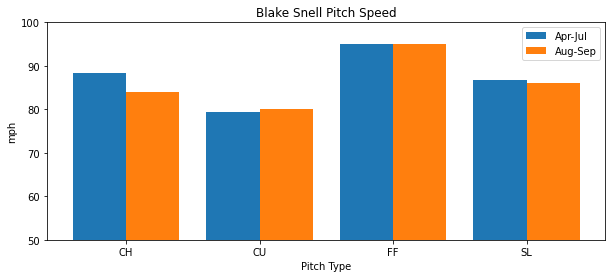

In [16]:
plt.figure(figsize=(10,4))

xbar=np.arange(len(apr_jul_speed['pitch_type']))-0.2
xbar2=xbar+0.4
xcol=['CH', 'CU', 'FF', 'SL']

plt.bar(xbar, apr_jul_speed['release_speed'], width=0.4, label='Apr-Jul')
plt.bar(xbar2, aug_sep_speed['release_speed'], width=0.4, label='Aug-Sep')

plt.title('Blake Snell Pitch Speed')
plt.xticks(xbar+0.2, xcol)
plt.xlabel('Pitch Type')
plt.ylabel('mph')
plt.ylim(50,100)
plt.legend()

8월 이전과 이후로 나누어 구종별 구속을 그래프로 표현하였다. 8월 이후 거의 던지지 않은 체인지업을 제외하고 **구속의 변화는 없었다.**

### 구종별 분석

In [17]:
# 4~7월
apr_jul_shot = total[total['game_date']<'2021-08-01']
# 8~9월
aug_sep_shot = total[total['game_date']>='2021-08-01']


ff_apr = apr_jul_shot[apr_jul_shot['pitch_type']=='FF']['description'].value_counts().reset_index()
sl_apr = apr_jul_shot[apr_jul_shot['pitch_type']=='SL']['description'].value_counts().reset_index()
cu_apr = apr_jul_shot[apr_jul_shot['pitch_type']=='CU']['description'].value_counts().reset_index()
ch_apr = apr_jul_shot[apr_jul_shot['pitch_type']=='CH']['description'].value_counts().reset_index()

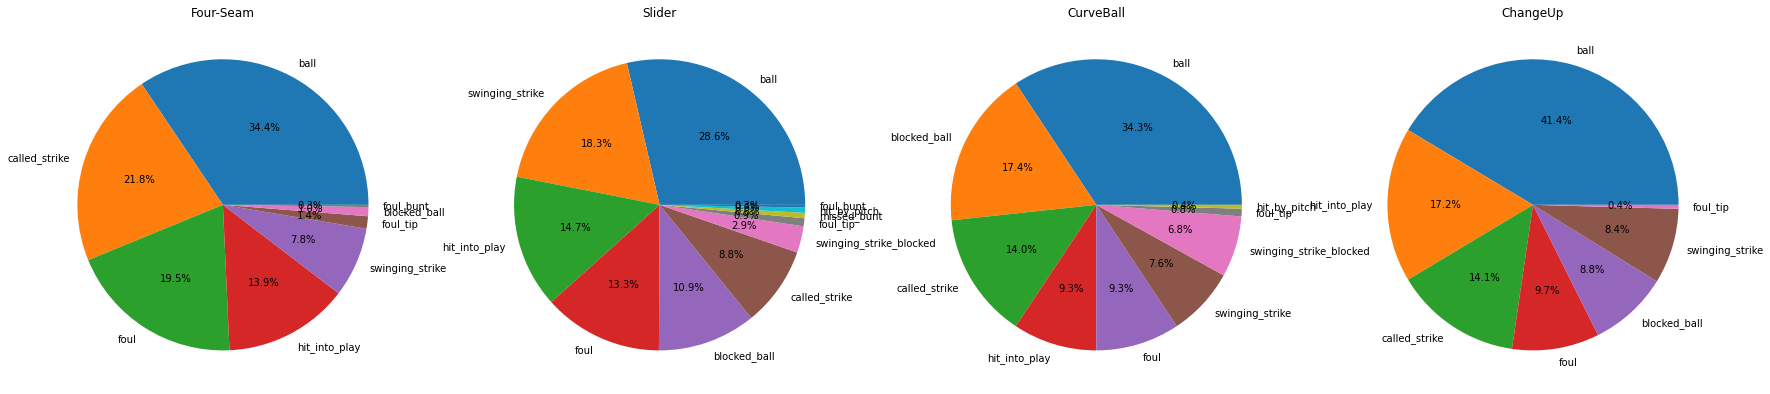

In [18]:
plt.figure(figsize=(30,20))
plt.subplot(1,4,1)
plt.pie(ff_apr['description'], labels=ff_apr['index'], autopct='%.1f%%')
plt.title('Four-Seam')
plt.subplot(1,4,2)
plt.pie(sl_apr['description'], labels=sl_apr['index'], autopct='%.1f%%')
plt.title('Slider')
plt.subplot(1,4,3)
plt.pie(cu_apr['description'], labels=cu_apr['index'], autopct='%.1f%%')
plt.title('CurveBall')
plt.subplot(1,4,4)
plt.pie(ch_apr['description'], labels=ch_apr['index'], autopct='%.1f%%')
plt.title('ChangeUp')
plt.show()

4월에서 7월까지 데이터를 확인해보니, 체인지업의 경우 **Ball의 비중(41.4%)이 가장 높았고**, **hit_into_play(17.2%)의 비중도 가장 높았다.** 두 수치를 더하면 **체인지업의 약 60%가 볼이거나 hit가 되는 상황이다.**
*****************************

### in 2 Strikes

Blake Snell이 2스트라이크 상황에서 던진 구종 분석

In [20]:
apr_jul_winshot = apr_jul_shot[apr_jul_shot['strikes']==2]

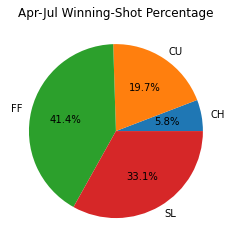

In [21]:
apr_jul_windist = apr_jul_winshot.groupby('pitch_type')['type'].count().reset_index().rename(columns={'type': 'count'})
plt.pie(apr_jul_windist['count'], labels=apr_jul_windist['pitch_type'], autopct='%.1f%%')
plt.title('Apr-Jul Winning-Shot Percentage')
plt.show()

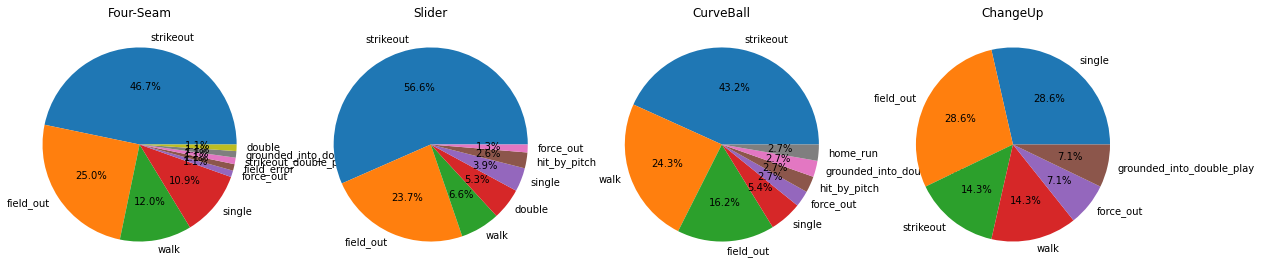

In [22]:
apr_jul_winff = apr_jul_winshot[apr_jul_winshot['pitch_type']=='FF']['events'].value_counts().reset_index()
apr_jul_winsl = apr_jul_winshot[apr_jul_winshot['pitch_type']=='SL']['events'].value_counts().reset_index()
apr_jul_wincu = apr_jul_winshot[apr_jul_winshot['pitch_type']=='CU']['events'].value_counts().reset_index()
apr_jul_winch = apr_jul_winshot[apr_jul_winshot['pitch_type']=='CH']['events'].value_counts().reset_index()
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.pie(apr_jul_winff['events'], labels=apr_jul_winff['index'], autopct='%.1f%%')
plt.title('Four-Seam')
plt.subplot(1,4,2)
plt.pie(apr_jul_winsl['events'], labels=apr_jul_winsl['index'], autopct='%.1f%%')
plt.title('Slider')
plt.subplot(1,4,3)
plt.pie(apr_jul_wincu['events'], labels=apr_jul_wincu['index'], autopct='%.1f%%')
plt.title('CurveBall')
plt.subplot(1,4,4)
plt.pie(apr_jul_winch['events'], labels=apr_jul_winch['index'], autopct='%.1f%%')
plt.title('ChangeUp')
plt.show()

2스트라이크 상황에서 Snell이 던진 구종별 event를 확인해보았다. 포심과 슬라이더의 경우, 삼진아웃과 필드아웃이 많은 비중을 차지하고 있었다. 사사구의 비율이 적었다.   
   
다른 구종들은 삼진아웃 비중이 가장 높았지만 **체인지업은 삼진아웃 비율이 14.3%로 저조**하였고, **싱글안타의 비율은 무려 28.6%로** 네가지 구종 중 가장 높았다.    
    
    
이처럼 체인지업의 저조한 성적때문에 후반기 체인지업의 비중을 낮춰서 던진 것으로 보인다.
**************************

### vs RHH, LHH

In [23]:
rhh = total[total['stand']=='R']
lhh = total[total['stand']=='L']

In [24]:
rhh_type = rhh['pitch_type'].value_counts().reset_index()
lhh_type = lhh['pitch_type'].value_counts().reset_index()

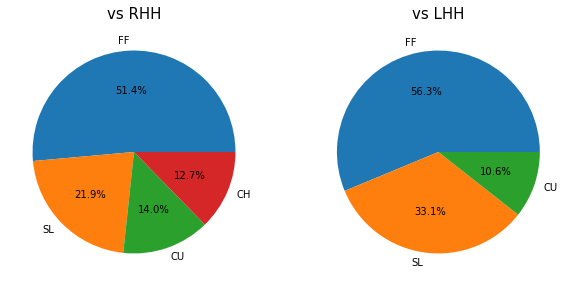

In [25]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.pie(rhh_type['pitch_type'], labels=rhh_type['index'], autopct='%.1f%%')
plt.title('vs RHH', size=15)
plt.subplot(1,2,2)
plt.pie(lhh_type['pitch_type'], labels=lhh_type['index'], autopct='%.1f%%')
plt.title('vs LHH', size=15)
plt.show()

**좌타자를 상대로 체인지업을 단 한개도 던지지 않았다.**
******************

#### 1. 포심

In [26]:
rhh_ff = rhh[rhh['pitch_type']=='FF'][['plate_x','plate_z','type']]
lhh_ff = lhh[lhh['pitch_type']=='FF'][['plate_x','plate_z','type']]

In [27]:
import seaborn as sns

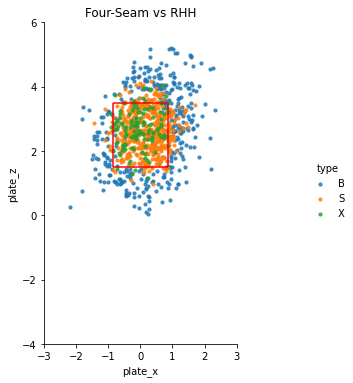

In [28]:
sns.lmplot(data=rhh_ff, x='plate_x', y='plate_z', hue='type', hue_order=['B', 'S', 'X'],fit_reg=False, scatter_kws={"s": 10})
plt.title('Four-Seam vs RHH')
plt.xlim(-3,3)
plt.ylim(-4,6)
plt.vlines(-0.85, 1.5, 3.5, colors='r')
plt.vlines(0.85, 1.5, 3.5, colors='r')
plt.hlines(3.5, -0.85, 0.85, colors='r')
plt.hlines(1.5, -0.85, 0.85, colors='r')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

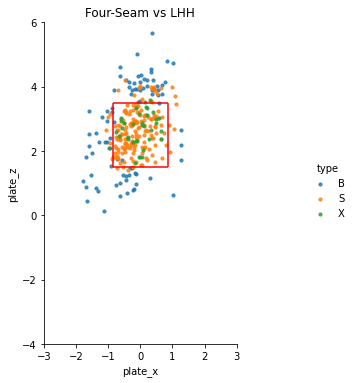

In [29]:
sns.lmplot(data=lhh_ff, x='plate_x', y='plate_z', hue='type', hue_order=['B','S','X'], fit_reg=False, scatter_kws={"s": 10})
plt.title('Four-Seam vs LHH')
plt.xlim(-3,3)
plt.ylim(-4,6)
plt.vlines(-0.85, 1.5, 3.5, colors='r')
plt.vlines(0.85, 1.5, 3.5, colors='r')
plt.hlines(3.5, -0.85, 0.85, colors='r')
plt.hlines(1.5, -0.85, 0.85, colors='r')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

#### 2. 슬라이더

In [30]:
rhh_sl = rhh[rhh['pitch_type']=='SL'][['plate_x','plate_z','type']]
lhh_sl = lhh[lhh['pitch_type']=='SL'][['plate_x','plate_z','type']]

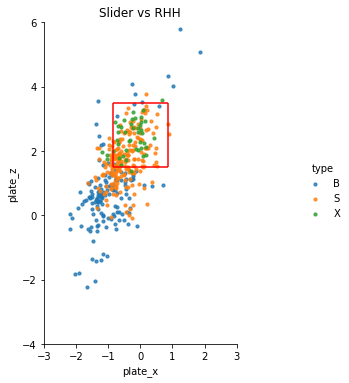

In [31]:
sns.lmplot(data=rhh_sl, x='plate_x', y='plate_z', hue='type', hue_order=['B', 'S', 'X'] ,fit_reg=False, scatter_kws={"s": 10})
plt.title('Slider vs RHH')
plt.xlim(-3,3)
plt.ylim(-4,6)
plt.vlines(-0.85, 1.5, 3.5, colors='r')
plt.vlines(0.85, 1.5, 3.5, colors='r')
plt.hlines(3.5, -0.85, 0.85, colors='r')
plt.hlines(1.5, -0.85, 0.85, colors='r')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

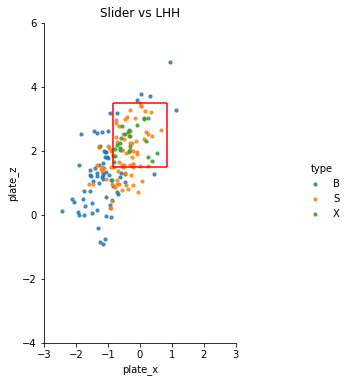

In [32]:
sns.lmplot(data=lhh_sl, x='plate_x', y='plate_z', hue='type', hue_order=['B', 'S', 'X'] ,fit_reg=False, scatter_kws={"s": 10})
plt.title('Slider vs LHH')
plt.xlim(-3,3)
plt.ylim(-4,6)
plt.vlines(-0.85, 1.5, 3.5, colors='r')
plt.vlines(0.85, 1.5, 3.5, colors='r')
plt.hlines(3.5, -0.85, 0.85, colors='r')
plt.hlines(1.5, -0.85, 0.85, colors='r')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

#### 3. 커브

In [33]:
rhh_cu = rhh[rhh['pitch_type']=='CU'][['plate_x','plate_z','type']]
lhh_cu = lhh[lhh['pitch_type']=='CU'][['plate_x','plate_z','type']]

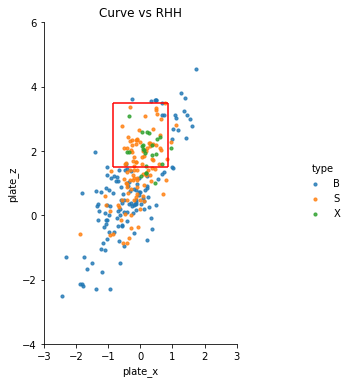

In [34]:
sns.lmplot(data=rhh_cu, x='plate_x', y='plate_z', hue='type', hue_order=['B', 'S', 'X'] ,fit_reg=False, scatter_kws={"s": 10})
plt.title('Curve vs RHH')
plt.xlim(-3,3)
plt.ylim(-4,6)
plt.vlines(-0.85, 1.5, 3.5, colors='r')
plt.vlines(0.85, 1.5, 3.5, colors='r')
plt.hlines(3.5, -0.85, 0.85, colors='r')
plt.hlines(1.5, -0.85, 0.85, colors='r')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

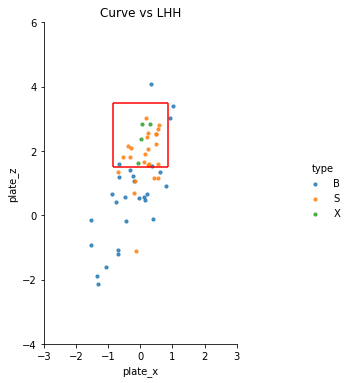

In [35]:
sns.lmplot(data=lhh_cu, x='plate_x', y='plate_z', hue='type', hue_order=['B', 'S', 'X'] ,fit_reg=False, scatter_kws={"s": 10})
plt.title('Curve vs LHH')
plt.xlim(-3,3)
plt.ylim(-4,6)
plt.vlines(-0.85, 1.5, 3.5, colors='r')
plt.vlines(0.85, 1.5, 3.5, colors='r')
plt.hlines(3.5, -0.85, 0.85, colors='r')
plt.hlines(1.5, -0.85, 0.85, colors='r')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

#### 4. 체인지업

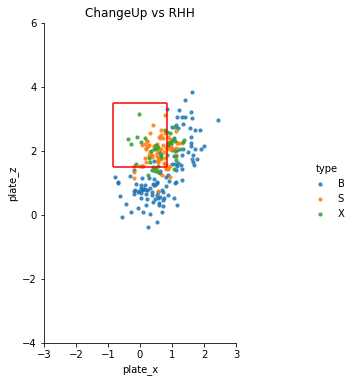

In [36]:
rhh_ch = rhh[rhh['pitch_type']=='CH'][['plate_x','plate_z','type']]
sns.lmplot(data=rhh_ch, x='plate_x', y='plate_z', hue='type', hue_order=['B', 'S', 'X'] ,fit_reg=False, scatter_kws={"s": 10})
plt.title('ChangeUp vs RHH')
plt.xlim(-3,3)
plt.ylim(-4,6)
plt.vlines(-0.85, 1.5, 3.5, colors='r')
plt.vlines(0.85, 1.5, 3.5, colors='r')
plt.hlines(3.5, -0.85, 0.85, colors='r')
plt.hlines(1.5, -0.85, 0.85, colors='r')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()